## Алгоритмы снижение размерности  
Далее на примерах я рассмотрю как работают выбранные алгоритмы снижение размерности, какие преимущества и недостатки есть у каждого и какие гиперпараметры на них нужно настраивать.  
  
### UMAP  
В предыдщем ноутбуке я рассматривала алгоритм t-SNE и его вариации вместе с PCA. Несмотря на то, что я нашла достаточно интересный пример на данных про пингвинчиков (ресурс 1), все-таки хочется сравнить работу всех трех алгоритмо. Для этого нужно работать с одними и теми же данными.  
Поэтому я возьму датасет из рукописных цифр с прошлого ноутбука и проделаю все то же самое, но используя алгоритм UMAP. К тому же нам обещали, что он справляется со своей задачей гораздо точнее и быстрее, чем даже tSNE на PCA.  
  
Ресурс: https://umap-learn.readthedocs.io/en/latest/basic_usage.html  
Ресурс: https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time

from __future__ import print_function
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import umap

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline


Загрузим наш датасет из цифр.

In [2]:
mnist = fetch_openml("mnist_784")
X = mnist.data / 255.0
y = mnist.target

feat_cols = ['pixel' + str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X, columns=feat_cols)
df['y'] = y
df['label'] = df['y'].apply(lambda i: str(i))

Попробуем прогнать сначала на выборке из 10.000 случайных данных. Иначе вдруг UMAP работает не намного быстрее tSNE и мы будем очень долго ждать результатов

In [3]:
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

In [4]:
N = 10000
df_subset = df.loc[rndperm[:N],:].copy()
data_subset = df_subset[feat_cols].values

time_start = time.time()

reducer = umap.UMAP(n_components=2)
umap_result = reducer.fit_transform(data_subset)
print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 28.13356852531433 seconds


Можем вспомнить, что t-SNE с этой же задачей справился за 191 секуду. Значительные улучшения во времени! UMAP сработал в 8,5 раз быстрее. Посмотрим, что получилось в результате

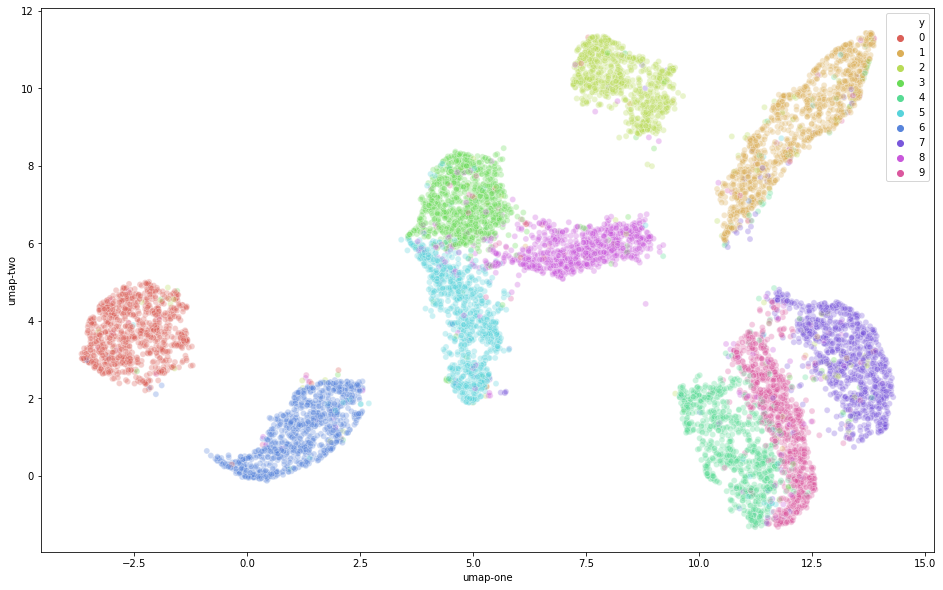

In [5]:
df_subset['umap-one'] = umap_result[:,0]
df_subset['umap-two'] = umap_result[:,1] 

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="umap-one", y="umap-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3
)

Сравним результат с лучшим с прошлого ноутбука (к примеру t-SNE на PCA_100).

In [7]:
pca_100 = PCA(n_components=100)
pca_result_100 = pca_100.fit_transform(data_subset)

tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_pca_results_100 = tsne.fit_transform(pca_result_100)

df_subset['tsne-pca100-one'] = tsne_pca_results_100[:,0]
df_subset['tsne-pca100-two'] = tsne_pca_results_100[:,1]

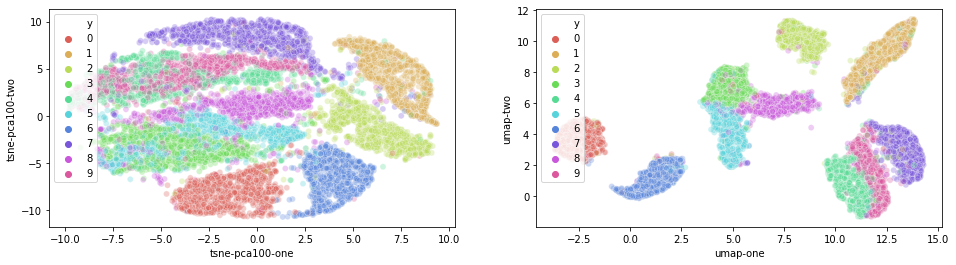

In [8]:
plt.figure(figsize=(16,4))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="tsne-pca100-one", y="tsne-pca100-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="umap-one", y="umap-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3
)

Видно, что UMAP выигрывает и по времени и по результату, даже у самого быстрого и более точного варианта t-SNE.  
  
Теперь посмотрим что будет, если мы возьмем весь датасет. Запускать его на t-SNE я не буду, так как это займет минут 20. Попробуем на UMAP

In [9]:
feat_cols = ['pixel' + str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X, columns=feat_cols)
df['y'] = y
df['label'] = df['y'].apply(lambda i: str(i))

N = df.shape[0]
df_subset = df.loc[rndperm[:N],:].copy()
data_subset = df_subset[feat_cols].values

time_start = time.time()

reducer = umap.UMAP(n_components=2)
umap_result = reducer.fit_transform(data_subset)
print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 70.95206665992737 seconds


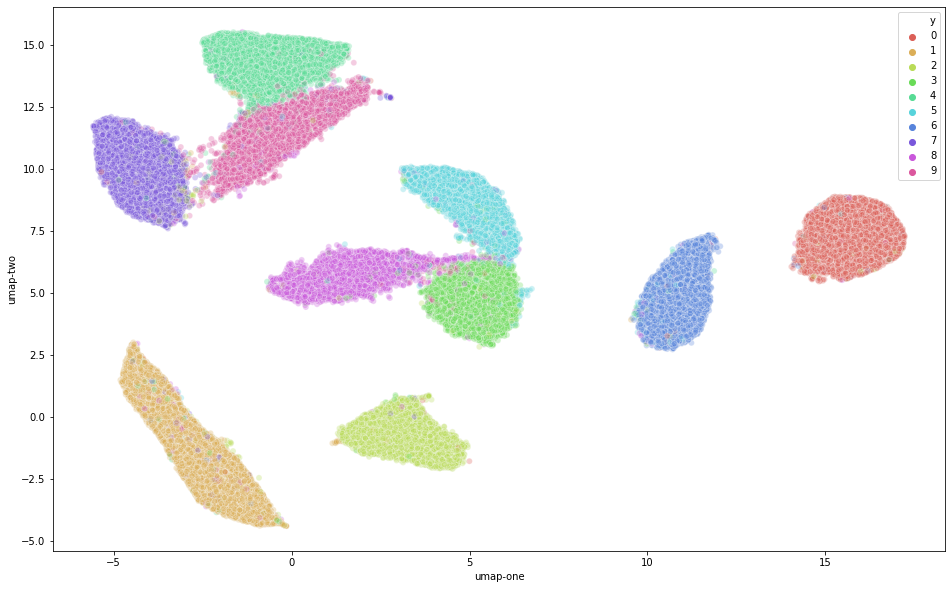

In [10]:
df_subset['umap-one'] = umap_result[:,0]
df_subset['umap-two'] = umap_result[:,1] 

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="umap-one", y="umap-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3
)


На мой субъективный взгляд все-таки UMAP, как я поняла, самый современный и быстрый алгоритм снижения размерности. Он работает быстрее и лучше отделяет классы друг от друга. Для дальнейшей работы я бы использовала именно его, хотя это может сильно зависеть от представленных данных.  
Возможно перед использованием на конкретной задаче, прежде стоит поэкспериментировать со всеми тремя